In [49]:
import bm3d
import os, sys, glob
import cv2
import numpy as np
import PIL
import matplotlib.pyplot as plt

In [2]:
from core.data_loader import sem_generator,patch_generator, load_whole_image

In [22]:
data_path = "Samsung_SNU_1474x3010_aligned"
num_per_Ffolder = 16
whole_images = load_whole_image(data_path,num_per_Ffolder)

=== extracting SET1 ===
Samsung_SNU_1474x3010_aligned/SET1/F16_6.png


NameError: name 'exist' is not defined

In [36]:
def load_whole_image_in_folder(path : str) -> dict:
    whole_images : dict = dict()
    for set_number in sorted(os.listdir(path)):
        set_path = os.path.join(path,set_number)
        images = {}
        for img_name in sorted(os.listdir(set_path)):
            if "checkpoints" in img_name:
                continue
            img_path = os.path.join(set_path,img_name)
            images[f"{img_name}"] = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        whole_images[set_number] = images
    return whole_images
whole_images = load_whole_image_in_folder(data_path)

In [32]:
whole_images?

Type:        dict
String form:
{'SET1': {'SET1_F16_1.png': array([[162, 158, 113, ..., 133, 116, 126],
           [ 85, 113, 109, .. <...>  [ 75, 126, 107, ..., 143, 114,  97],
           [ 93, 115,  58, ..., 108, 121, 119]], dtype=uint8)}}
Length:      4
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


In [52]:
np.save('test.npy',noisy_1_F8)

In [50]:
a = [1,2,3]
np.mean(a)

2.0

In [39]:
whole_images['SET1'].keys()

dict_keys(['F16_1.png', 'F16_10.png', 'F16_11.png', 'F16_12.png', 'F16_13.png', 'F16_14.png', 'F16_15.png', 'F16_16.png', 'F16_2.png', 'F16_3.png', 'F16_4.png', 'F16_5.png', 'F16_6.png', 'F16_7.png', 'F16_8.png', 'F16_9.png', 'F32_1.png', 'F32_10.png', 'F32_11.png', 'F32_12.png', 'F32_13.png', 'F32_14.png', 'F32_15.png', 'F32_16.png', 'F32_2.png', 'F32_3.png', 'F32_4.png', 'F32_5.png', 'F32_6.png', 'F32_7.png', 'F32_8.png', 'F32_9.png', 'F64_1.png', 'F64_10.png', 'F64_11.png', 'F64_12.png', 'F64_13.png', 'F64_14.png', 'F64_15.png', 'F64_16.png', 'F64_2.png', 'F64_3.png', 'F64_4.png', 'F64_5.png', 'F64_6.png', 'F64_7.png', 'F64_8.png', 'F64_9.png', 'F8_1.png', 'F8_10.png', 'F8_11.png', 'F8_12.png', 'F8_13.png', 'F8_14.png', 'F8_15.png', 'F8_16.png', 'F8_2.png', 'F8_3.png', 'F8_4.png', 'F8_5.png', 'F8_6.png', 'F8_7.png', 'F8_8.png', 'F8_9.png'])

In [5]:
bm3d.bm3d?

Signature:
bm3d.bm3d(
    z: numpy.ndarray,
    sigma_psd: Union[numpy.ndarray, list, float],
    profile: Union[bm3d.profiles.BM3DProfile, str] = 'np',
    stage_arg: Union[bm3d.profiles.BM3DStages, numpy.ndarray] = <BM3DStages.ALL_STAGES: 3>,
    blockmatches: tuple = (False, False),
) -> Union[numpy.ndarray, Tuple[numpy.ndarray, Tuple[numpy.ndarray, numpy.ndarray]]]
Docstring:
Perform BM3D denoising on z: either hard-thresholding, Wiener filtering or both.

:param z: Noisy image. either MxN or MxNxC where C is the channel count.
          For multichannel images, blockmatching is performed on the first channel.
:param sigma_psd: Noise PSD, either MxN or MxNxC (different PSDs for different channels)
        or
       sigma_psd: Noise standard deviation, either float, or length C list of floats
:param profile: Settings for BM3D: BM3DProfile object or a string
                ('np', 'refilter', 'vn', 'vn_old', 'high', 'deb'). Default 'np'.
:param stage_arg: Determines whether to perfor

In [40]:
noisy_1_F8 = whole_images['SET1']['F8_1.png']
label_1_F64 = whole_images['SET1']['F64_1.png']
print(noisy_1_F8.shape, label_1_F64.shape)
print("before denoising",structural_similarity(label_1_F64,noisy_1_F8), peak_signal_noise_ratio(label_1_F64,noisy_1_F8))

(1474, 3010) (1474, 3010)
before denoising 0.09400767284304898 15.903577958648627


In [41]:
denoised_1_F8 = bm3d.bm3d(noisy_1_F8,40)
denoised_1_F8_uint8 = denoised_1_F8.astype('uint8')

In [43]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio

print("after denoising",structural_similarity(label_1_F64,denoised_1_F8_uint8), peak_signal_noise_ratio(label_1_F64,denoised_1_F8_uint8))

after denoising 0.24898747134113097 20.411432683055082


In [65]:
t_d = {"a" : denoised_1_F8, 'b': denoised_1_F8}

In [66]:
np.save("t.npy",t_d)

In [67]:
t = np.load("t.npy",allow_pickle=True)


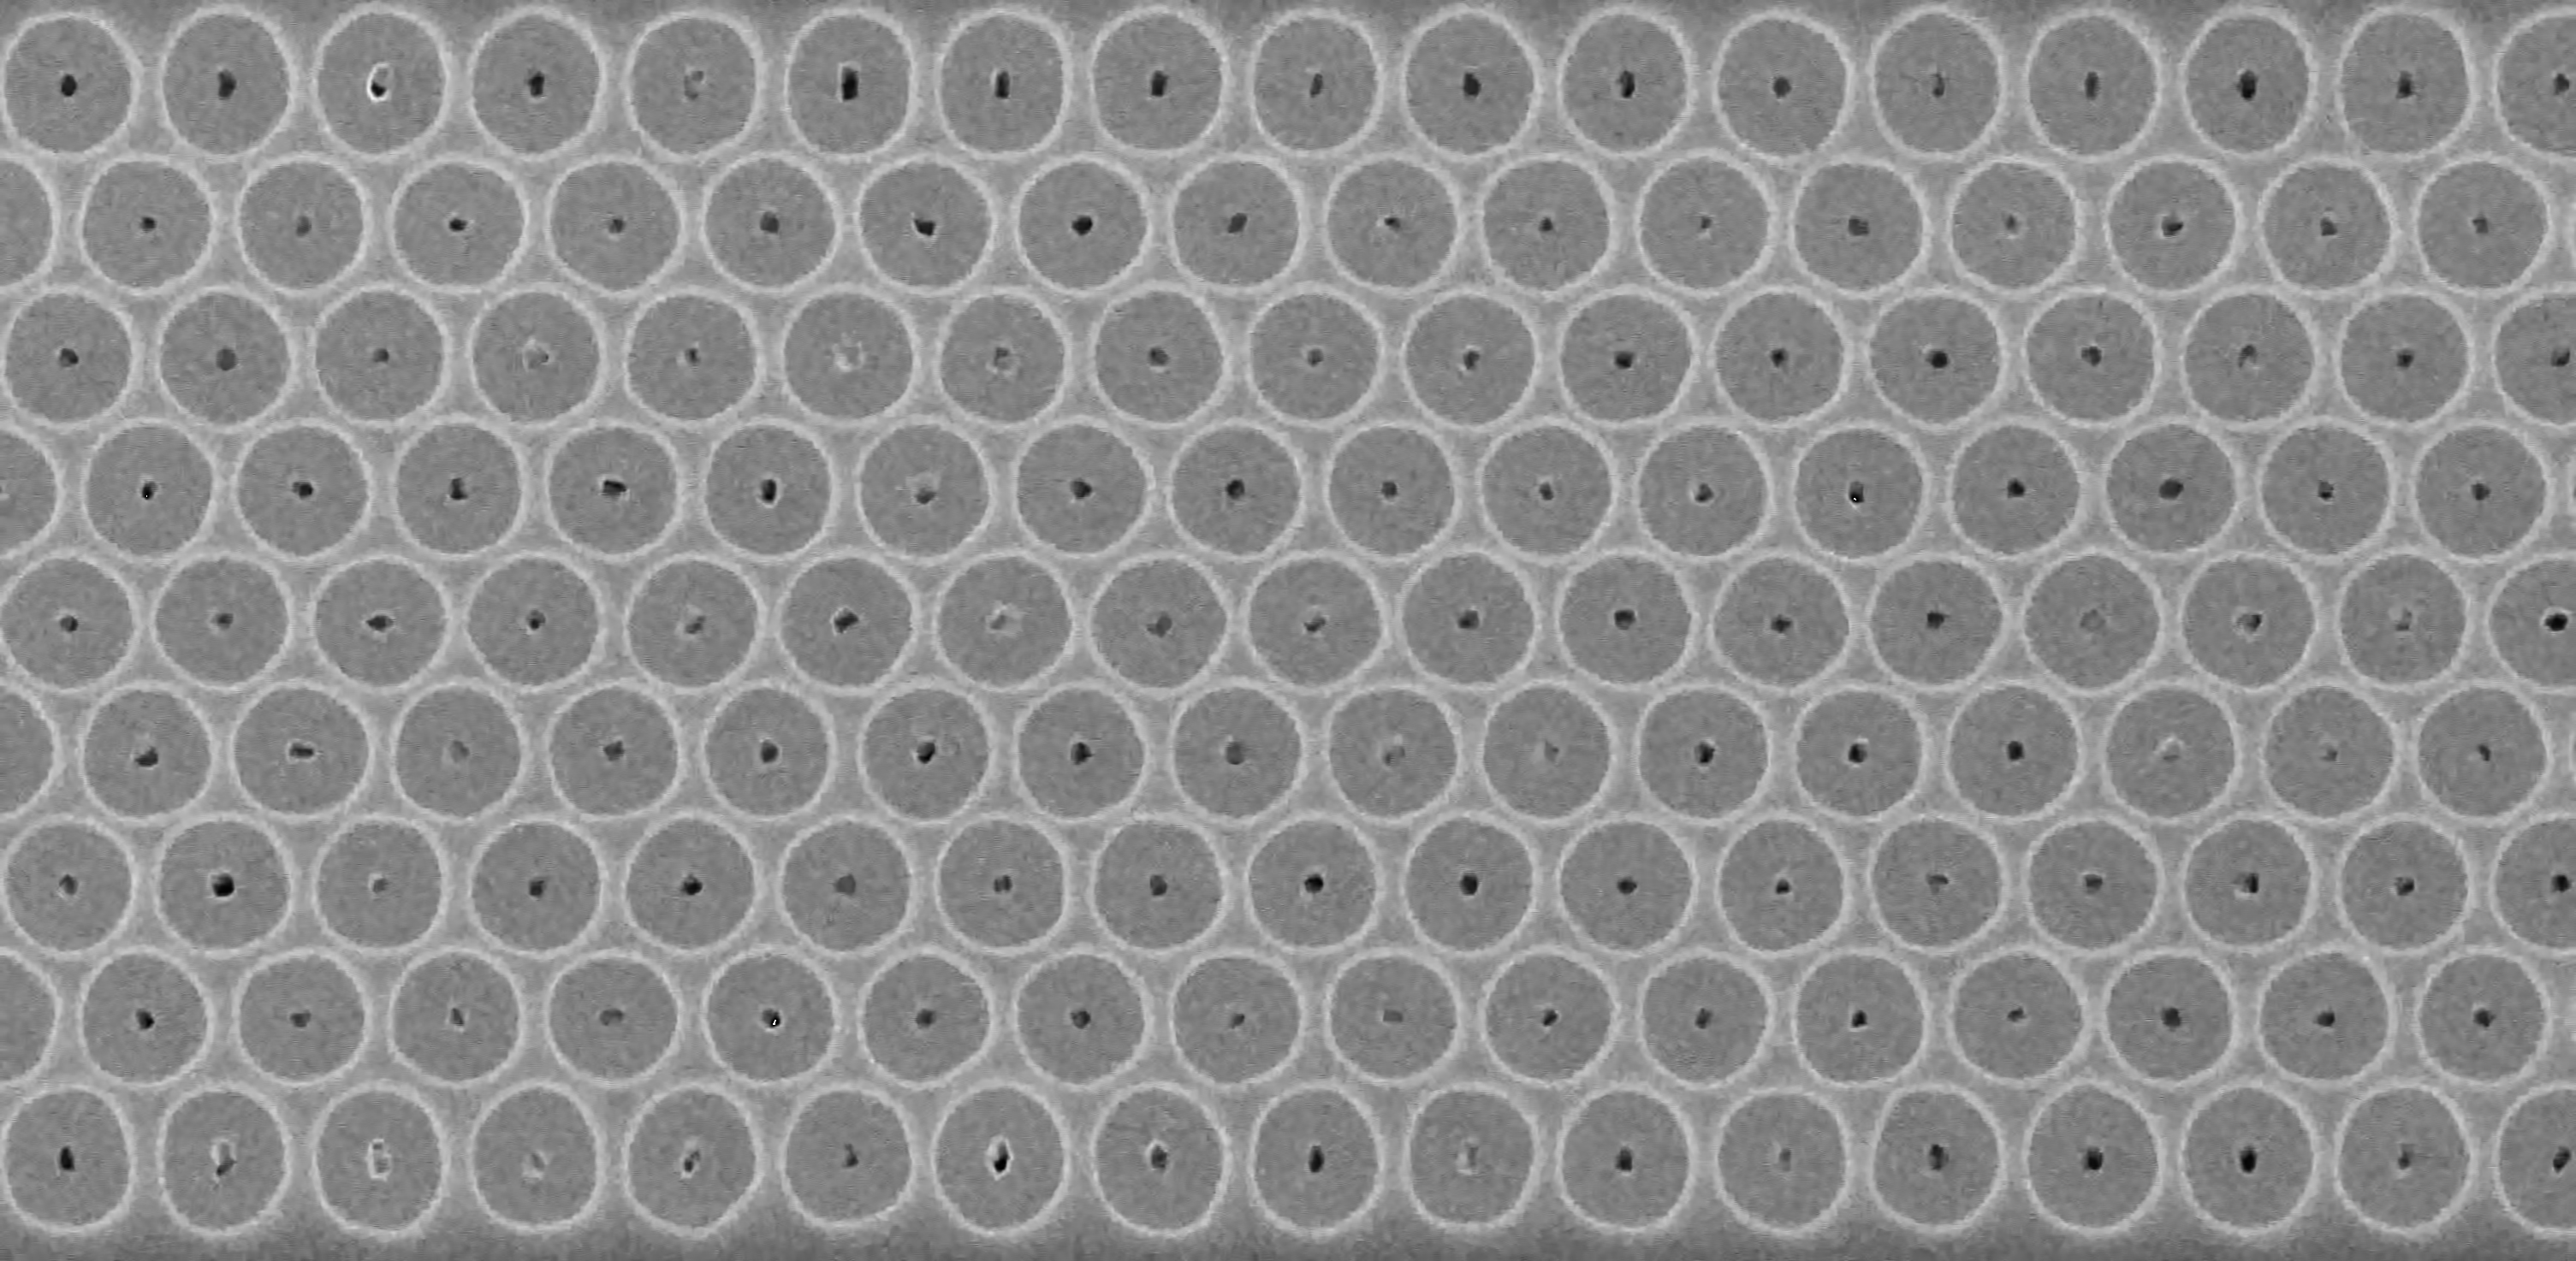

In [44]:
PIL.Image.fromarray(denoised_1_F8_uint8)

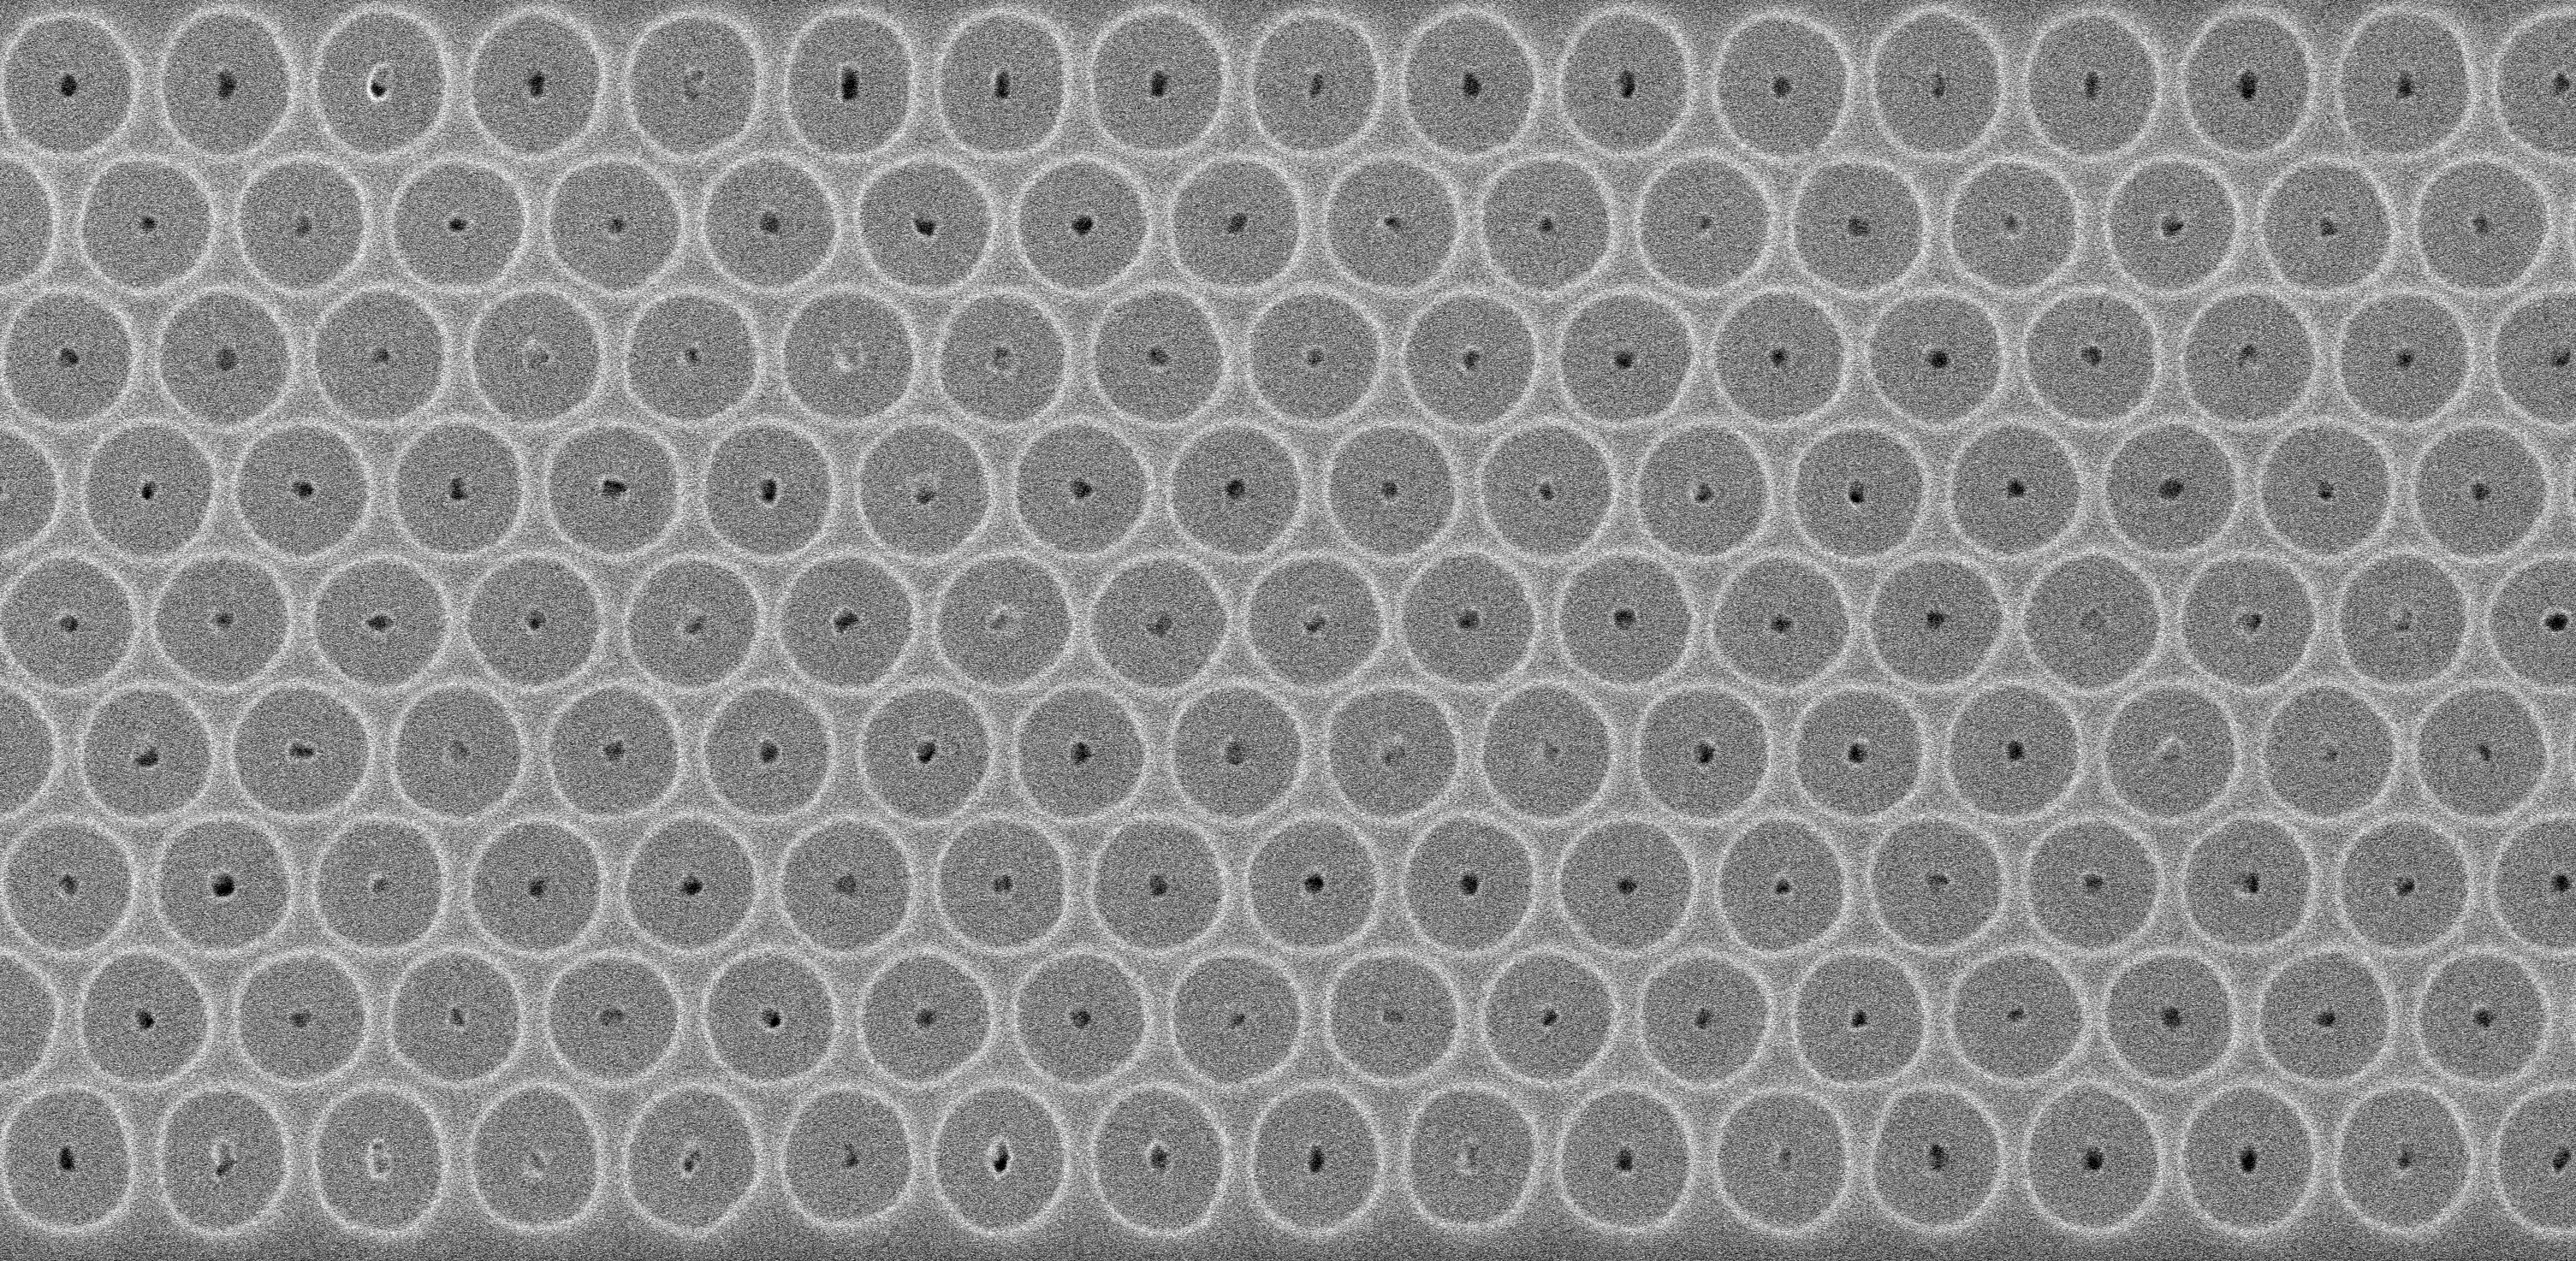

In [45]:
PIL.Image.fromarray(noisy_1_F8)